# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Noel Schwibus

Datum: 17.11.2023

Gruppe: 45

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann man mit zwei einfachen Temperatursensoren die Wärmekapazität eines Behälters bestimmen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


In dem kleinen Glas befindet sich warmes Wasser. In dem großen Glas befindet sich kaltes Wasser. In beiden Gläsern sind Temperatursensoren, welche am raspberry pi angeschlossen sind.

Zu Beginn wird das Messprogramm auf dem raspberry pi gestartet. Nachdem die Sensoren für eine kurze Zeit die Temperaturen des Wassers gemessen haben, wird das warme Wasser mit seinem Sensor in das Glas mit dem kalte Wasser geschüttet. Nachdem sich das kalte und warme Wasser vermischt haben wird das Messprogramm gestoppt.

![Wärmekapazität](figures/Wärmekapazität.jpg)

## Versuchsauswertung

In [45]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5
from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [46]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = 'data/data_heat_capacity/data_heat_capacity.h5'
data_path = "data/data_heat_capacity"
# DONE #

In [47]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
s = h5.File(path,'r')
h = s["RawData"]
RawData = h["RawData"]

created = s.attrs["created"]
experiment = s.attrs["experiment"]
group_number = s.attrs["group_number"]
authors = s.attrs["authors"]

UUID = list(RawData.keys())
sensor1_path = "RawData/RawData/"+UUID[0]
sensor2_path = "RawData/RawData/"+UUID[1]

sensor1 = s[sensor1_path]
sensor2 = s[sensor2_path]

temp1 = list(sensor1["temperature"])
temp2 = list(sensor2["temperature"])

time1 = list(sensor1["time step"])
time2 = list(sensor2["time step"])

time1 = time1-time1[0]
time2 = time2-time2[0]

# DONE #

#### (ii) Daten ploten

Text(0, 0.5, 'Temperatur in Grad Celsius')

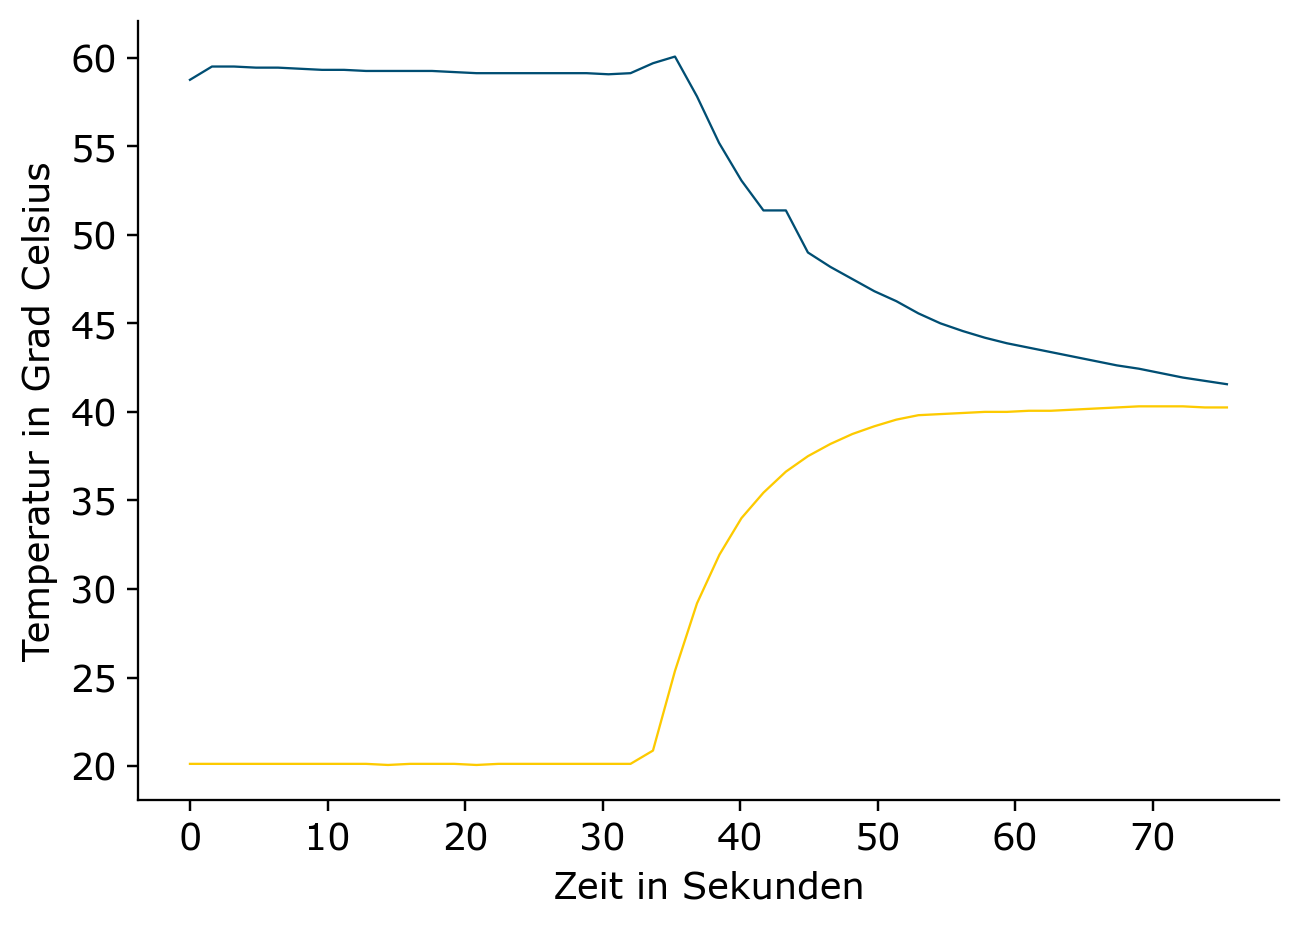

In [48]:
# TODO: Use the temperature and time data for plotting
fig = plt.figure()
plt.plot(time1,temp1)
plt.plot(time2,temp2)
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperatur in Grad Celsius")

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [49]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
mass_cold = float(m_json.get_json_entry(data_path, "1ee82ff1-caf0-6add-9f73-e7ed39734462",["probe", "mass cold"]))
mass_warm = float(m_json.get_json_entry(data_path,"1ee82ff1-caf0-6add-9f73-e7ed39734462",["probe", "mass warm"]))
# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [50]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T_1 = temp2[0]
T_2 = temp1[0]
T_M = temp2[-1]

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [51]:
# TODO: Calculate heat capacity of the calorimeter
C = ((mass_warm*water_heat_capa*(T_2-T_M))/(T_M-T_1))-mass_cold*water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [52]:
# TODO: Print result
print(C," in kJ/K")
# DONE #

3.7126708074534918  in kJ/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die spezifische Wärmekapazität von Glas liegt ungefähr bei 0,8 kJ/(kg*K). Die Wärmekapazität des Glases müsste somit ungefähr bei 0,31 kJ/K liegen. Der gemessene Wert ist somit eine Größenordnung über dem eigentlichen Wert, weshalb die Forschungsfrage nicht bestätigt werden kann.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch war einfach durchzuführen und hat ein anschauliches Ergebnis geliefert. Die gemessene Wärmekapaziät unterscheidet sich leider deutlich von der errechneten Wärmekapazität. Diese Differenz kommt vemutlich daher, dass sich die Temperaturen am Ende nicht komplett angeglichen haben und 100 Prozent des warmen Wassers in Kalten Wasser gelandet sind. Bei einer erneuten Messung könnte man diese Einflussfaktoren verändern und das Ergebnis vergleichen